In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Model Machine Learning : Credit Card Overdue Prediction

<hr>

## Dataset

<hr>

In [2]:
dfapp = pd.read_csv('application_record.csv')
dfapp.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
dfcr = pd.read_csv('credit_record.csv')
dfcr.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## Data Dictionary

<img src = 'ModelImage/Credit Approval Explanation.JPG' width="600" height="400" />

<img src = 'ModelImage/Credit record explanation.JPG' width="600" height="400" />

### Defining Target

Late payments can have a significant effect on credit card score.The late payment is added to credit report when your payment is more than 30 days late. An entry is added to your credit report and can stay for seven years. 

in this case :
- Approve: if status below 30 days due (Status : 0, C, X) (Label : 0)
- Reject : if stats above 30 days due ( Status : 1,2,3,4,5) (Label : 1)


In [4]:
dfcr['target'] = dfcr['STATUS'].apply(lambda x : 0 if x == 'X' or x == 'C' or x == '0' else 1)

In [5]:
dfcr = dfcr.groupby('ID').max()
dfcr = dfcr.drop(['MONTHS_BALANCE','STATUS'], axis=1)

In [6]:
# Merge Dataset

dfapproval = dfcr.merge(dfapp, left_on='ID', right_on='ID')
dfapproval.head()

# Renaming Columns
dfapproval.rename(columns={
    'CODE_GENDER':'Gender',
    'FLAG_OWN_CAR':'Car',
    'FLAG_OWN_REALTY':'Property',
    'CNT_CHILDREN':'NoChild',
    'AMT_INCOME_TOTAL':'Income',
    'NAME_EDUCATION_TYPE':'Education',
    'NAME_FAMILY_STATUS':'MartialStat',
    'NAME_HOUSING_TYPE':'HousingType',
    'FLAG_EMAIL':'Email',
    'NAME_INCOME_TYPE':'IncomeType',
    'FLAG_MOBIL':'MobilePhone',
    'FLAG_WORK_PHONE':'Workphone',
    'FLAG_PHONE':'Phone',
    'CNT_FAM_MEMBERS':'FamSize',
    'OCCUPATION_TYPE':'Occupation'},inplace=True)

dfapproval.head()

,ID,target,Gender,Car,Property,NoChild,Income,IncomeType,Education,MartialStat,HousingType,DAYS_BIRTH,DAYS_EMPLOYED,MobilePhone,Workphone,Phone,Email,Occupation,FamSize
0,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## Data Cleaning
<hr>

In [7]:
# Changing NAN Values of occupation type to Others
dfapproval['Occupation'] = dfapproval['Occupation'].fillna("Others")
dfapproval['Occupation'].unique()

array(['Others', 'Security staff', 'Sales staff', 'Accountants',
       'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff'], dtype=object)

In [8]:
# Changing Days_Birth into Age (Years)
dfapproval['Age'] =dfapproval['DAYS_BIRTH'].apply(lambda x : int(x/365 * -1))
dfapproval['Age']

0        32
1        32
2        58
3        52
4        52
         ..
36452    29
36453    29
36454    29
36455    29
36456    53
Name: Age, Length: 36457, dtype: int64

In [9]:
# Changing Days_Employee into  Length of Employment (LOE) (Years)
dfapproval['LOE'] = dfapproval['DAYS_EMPLOYED'].apply(lambda x : int(x/365 * -1))
dfapproval['LOE']

0        12
1        12
2         3
3         8
4         8
         ..
36452     4
36453     4
36454     4
36455     4
36456     5
Name: LOE, Length: 36457, dtype: int64

In [10]:
# Dropping Mobile Phone (Reason : EDA)
dfapproval = dfapproval.drop('MobilePhone', axis=1)

### Identifying Outliers in Numerical Data

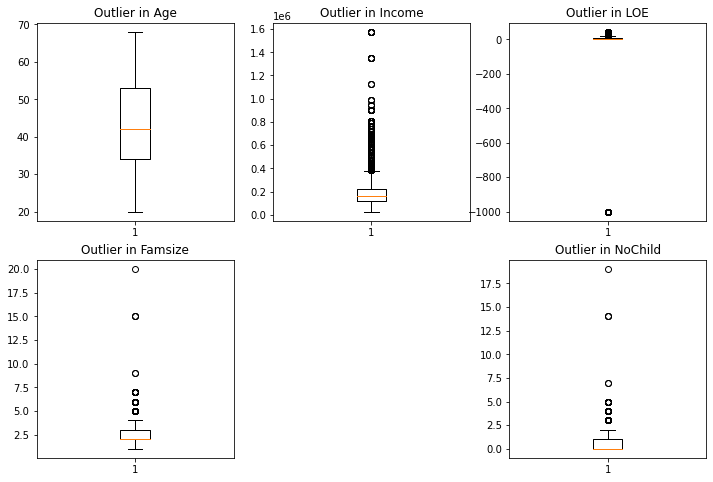

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.boxplot(dfapproval['Age'])
plt.title('Outlier in Age')

plt.subplot(232)
plt.boxplot(dfapproval['Income'])
plt.title('Outlier in Income')

plt.subplot(233)
plt.boxplot(dfapproval['LOE'])
plt.title('Outlier in LOE')

plt.subplot(234)
plt.boxplot(dfapproval['FamSize'])
plt.title('Outlier in Famsize')

plt.subplot(236)
plt.boxplot(dfapproval['NoChild'])
plt.title('Outlier in NoChild')

plt.show()

In [12]:
numdat = ['Income','LOE','FamSize','NoChild']
Q1 = dfapproval[numdat].quantile(0.25)
Q3 = dfapproval[numdat].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Income     103500.0
LOE             7.0
FamSize         1.0
NoChild         1.0
dtype: float64


In [13]:
dfapproval_new =dfapproval[~((dfapproval[numdat] < (Q1 - 1.5 * IQR)) |(dfapproval[numdat] > (Q3 + 1.5 * IQR))).any(axis=1)].copy()
print(dfapproval.shape)
print(dfapproval_new.shape)

(36457, 20)
(26518, 20)


In [14]:
print(dfapproval[dfapproval['target']==1].shape)
print(dfapproval_new[dfapproval_new['target']==1].shape)

(4291, 20)
(3178, 20)


In [15]:
dfapproval_new.head()

,ID,target,Gender,Car,Property,NoChild,Income,IncomeType,Education,MartialStat,HousingType,DAYS_BIRTH,DAYS_EMPLOYED,Workphone,Phone,Email,Occupation,FamSize,Age,LOE
2,5008806,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,58,3
3,5008808,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,52,8
4,5008809,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,52,8
5,5008810,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,52,8
6,5008811,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,52,8


###  Handling Categorical Data

In [16]:
dfapproval_new['Gender'] = dfapproval_new['Gender'].apply(lambda x: 1 if x == 'M' else 0 )
dfapproval_new['Car'] = dfapproval_new['Car'].apply(lambda x: 1 if x == 'Y' else 0 )
dfapproval_new['Property'] = dfapproval_new['Property'].apply(lambda x: 1 if x == 'Y' else 0 )

In [17]:
# Dummies for Categorical Data
categorical = ['IncomeType','Education','MartialStat','HousingType','Occupation']
dfdummy = pd.get_dummies(dfapproval_new[categorical])

### Split Dataset

In [18]:
dffeaturex = pd.concat([dfapproval_new[['Gender','Car','Property','NoChild','Income','Age','LOE','Workphone','Phone','Email','FamSize']],dfdummy],
                      axis='columns')
dffeaturey = dfapproval_new['target']
dffeaturex.shape

(26518, 51)

In [19]:
xtr, xts, ytr, yts = train_test_split(dffeaturex,dffeaturey, test_size = 0.2)
dftrain = pd.concat([xtr,ytr], axis=1)
dftes = pd.concat([xts,yts], axis=1)

## ML Models
<hr>

Model Machine Learning yang digunakan merupakan __Model _Classification___

Model ML: 
- Logistic Regression
- K-Nearest Neighbors
- DecisionTree
- Random Forest
- Gradient Boosting classifier

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score,  confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
MLLR = LogisticRegression()

In [22]:
MLLR.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Base Score LR
yp = MLLR.predict(xts)
print(yp)
print(f'Base Score (training) = {MLLR.score(xtr,ytr)}')
print(f'Base Score (test) = {MLLR.score(xts,yts)}')

print('Logistic Regression Base Report')
print(classification_report(yts, yp))
cm = confusion_matrix(yts, yp,  labels= [0,1])
dfcm = pd.DataFrame(
    cm, columns=['Pred 0','Pred 1'], index= ['Actual 0', 'Actual 1']
)
print(dfcm)
print('\n')

[0 0 0 ... 0 0 0]
Base Score (training) = 0.881116243989818
Base Score (test) = 0.8763197586726998
Logistic Regression Base Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4648
           1       0.00      0.00      0.00       656

    accuracy                           0.88      5304
   macro avg       0.44      0.50      0.47      5304
weighted avg       0.77      0.88      0.82      5304

          Pred 0  Pred 1
Actual 0    4648       0
Actual 1     656       0




c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

MLDT = DecisionTreeClassifier()

In [25]:
MLDT .fit(xtr,ytr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
# Base Score DT
yp = MLDT.predict(xts)
print(yp)
print(f'Base Score (training) = {MLDT.score(xtr,ytr)}')
print(f'Base Score (test) = {MLDT.score(xts,yts)}')

print('Decision Tree Base Report')
print(classification_report(yts, yp))
cm = confusion_matrix(yts, yp,  labels= [0,1])
dfcm = pd.DataFrame(
    cm, columns=['Pred 0','Pred 1'], index= ['Actual 0', 'Actual 1']
)
print(dfcm)
print('\n')

[0 0 0 ... 0 0 0]
Base Score (training) = 0.93230885264448
Base Score (test) = 0.8731146304675717
Decision Tree Base Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4648
           1       0.48      0.29      0.36       656

    accuracy                           0.87      5304
   macro avg       0.69      0.62      0.65      5304
weighted avg       0.85      0.87      0.86      5304

          Pred 0  Pred 1
Actual 0    4440     208
Actual 1     465     191




### K-Nearest Neighbors (KNN)

In [27]:
def k(x) :
    k = int(np.sqrt(x))
    if k % 2 == 0:
        k += 1
        return k
    else :
        return k
    
k(len(xtr))

145

In [28]:
from sklearn.neighbors import KNeighborsClassifier
MLKN = KNeighborsClassifier()

In [29]:
MLKN.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
# Base Score KNN
yp = MLKN.predict(xts)
print(yp)
print(f'Base Score (training) = {MLKN.score(xtr,ytr)}')
print(f'Base Score (test) = {MLKN.score(xts,yts)}')

print('KNN Base Report')
print(classification_report(yts, yp))
print(confusion_matrix(yts, yp))
print(dfcm)
print('\n')

[0 0 0 ... 0 0 0]
Base Score (training) = 0.9022815122089186
Base Score (test) = 0.8689668174962293
KNN Base Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4648
           1       0.43      0.18      0.25       656

    accuracy                           0.87      5304
   macro avg       0.66      0.57      0.59      5304
weighted avg       0.84      0.87      0.84      5304

[[4494  154]
 [ 541  115]]
          Pred 0  Pred 1
Actual 0    4440     208
Actual 1     465     191




### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

MLRF = RandomForestClassifier()

In [32]:
MLRF.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
# Base Score RF
yp = MLRF.predict(xts)
print(yp)
print(f'Base Score (training) = {MLRF.score(xtr,ytr)}')
print(f'Base Score (test) = {MLRF.score(xts,yts)}')

print('Random Forest Base Report')
print(classification_report(yts, yp))
cm = confusion_matrix(yts, yp,  labels= [0,1])
dfcm = pd.DataFrame(
    cm, columns=['Pred 0','Pred 1'], index= ['Actual 0', 'Actual 1']
)
print(dfcm)
print('\n')

[0 0 0 ... 0 0 0]
Base Score (training) = 0.93230885264448
Base Score (test) = 0.8802790346907994
Random Forest Base Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4648
           1       0.53      0.28      0.37       656

    accuracy                           0.88      5304
   macro avg       0.72      0.62      0.65      5304
weighted avg       0.86      0.88      0.86      5304

          Pred 0  Pred 1
Actual 0    4484     164
Actual 1     471     185




### Gradient Boosting Clasifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
MLGB = GradientBoostingClassifier()
MLGB.fit(xtr, ytr)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
# Base Score GB
yp = MLGB.predict(xts)
print(yp)
print(f'Base Score (training) = {MLGB.score(xtr,ytr)}')
print(f'Base Score (test) = {MLGB.score(xts,yts)}')
print(f'BACC Score (test) = {MLGB.score(xts,yts)}')

print('Gradient Boosting Base Report')
print(classification_report(yts, yp))
cm = confusion_matrix(yts, yp,  labels= [0,1])
dfcm = pd.DataFrame(
    cm, columns=['Pred 0','Pred 1'], index= ['Actual 0', 'Actual 1']
)
print(dfcm)
print('\n')

[0 0 0 ... 0 0 0]
Base Score (training) = 0.8827189591779014
Base Score (test) = 0.8776395173453997
BACC Score (test) = 0.8776395173453997
Gradient Boosting Base Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4648
           1       1.00      0.01      0.02       656

    accuracy                           0.88      5304
   macro avg       0.94      0.51      0.48      5304
weighted avg       0.89      0.88      0.82      5304

          Pred 0  Pred 1
Actual 0    4648       0
Actual 1     649       7




### Balanced Accuracy Score

In [37]:
from sklearn.metrics import balanced_accuracy_score

def BAC(model, title):
    bac = balanced_accuracy_score(yts,model.predict(xts))
    print(f'Balanced Accuracy Score {title} = {bac}')
    print('\n')

In [38]:
# Balanced Accuracy Score
BAC(MLLR,'Logistic Regression')
BAC(MLDT,'Decision Tree')
BAC(MLKN,'K-Nearest Neighbor')
BAC(MLRF,'Random Forest')
BAC(MLGB,'Gradient Boosting')

Balanced Accuracy Score Logistic Regression = 0.5


Balanced Accuracy Score Decision Tree = 0.6232040531463834


Balanced Accuracy Score K-Nearest Neighbor = 0.5710861739641493


Balanced Accuracy Score Random Forest = 0.6233641010033164


Balanced Accuracy Score Gradient Boosting = 0.5053353658536586




### Matthew CorrCoef (MCC)

In [39]:
from sklearn.metrics import matthews_corrcoef
def MCC (model, title):
    mcc = matthews_corrcoef(yts,model.predict(xts))
    print(f'MCC {title} = {mcc}')
    print('\n')

In [40]:
MCC(MLLR,'Logistic Regression')
MCC(MLDT,'Decision Tree')
MCC(MLKN,'K-Nearest Neighbor')
MCC(MLRF,'Random Forest')
MCC(MLGB,'Gradient Boosting')

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC Logistic Regression = 0.0


MCC Decision Tree = 0.30756294925709177


MCC K-Nearest Neighbor = 0.21331639600492194


MCC Random Forest = 0.3276191131636318


MCC Gradient Boosting = 0.09676430318603968




### ROC AUC

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
def ROC(model,title):
    fpr, tpr, thres = roc_curve(yts, model.predict_proba(xts)[:,1])
    roc_auc_score(yts,yp)
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], 'r:')
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(f'ROC {title}')

def AUC(model, title):
    auc = roc_auc_score(yts,model.predict_proba(xts)[:,1])
    print(f'ROC AUC Score {title} = {auc}')
    print('\n')
    

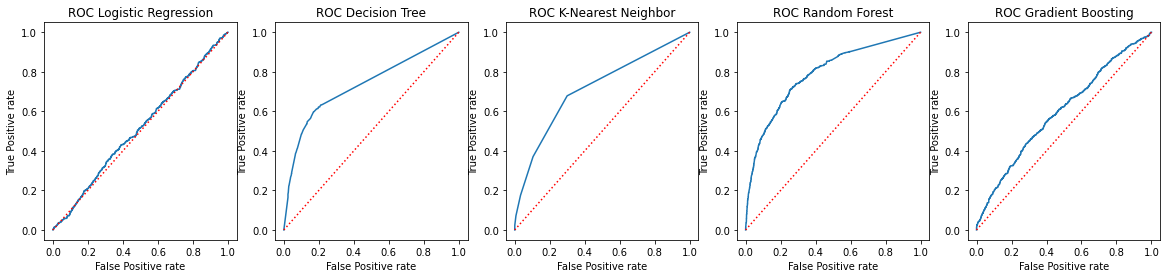

In [43]:
plt.figure(figsize=(20,4))

plt.subplot(151)
ROC(MLLR,'Logistic Regression')

plt.subplot(152)
ROC(MLDT,'Decision Tree')

plt.subplot(153)
ROC(MLKN,'K-Nearest Neighbor')

plt.subplot(154)
ROC(MLRF,'Random Forest')

plt.subplot(155)
ROC(MLGB,'Gradient Boosting')

plt.show()


In [44]:
#AUC Score
AUC(MLLR,'Logistic Regression')
AUC(MLDT,'Decision Tree')
AUC(MLKN,'K-Nearest Neighbor')
AUC(MLRF,'Random Forest')
AUC(MLGB,'Gradient Boosting')

ROC AUC Score Logistic Regression = 0.5118653512132152


ROC AUC Score Decision Tree = 0.7350583190777046


ROC AUC Score K-Nearest Neighbor = 0.7130514107825029


ROC AUC Score Random Forest = 0.787600915421267


ROC AUC Score Gradient Boosting = 0.5965500175790268




# Precision Recall Curve

In [45]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

def PR (model,title) :
    pr = plot_precision_recall_curve(model, xts, yts)
    pr.ax_.set_title(f' Precision-Recall curve {title} ')

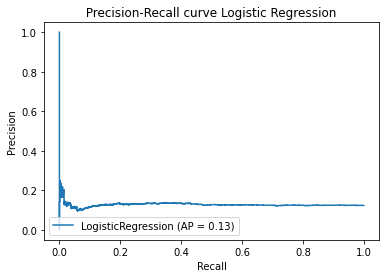

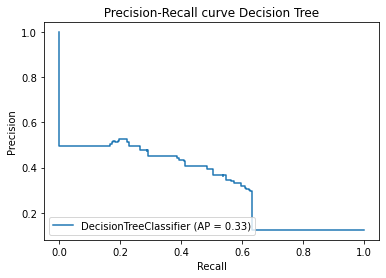

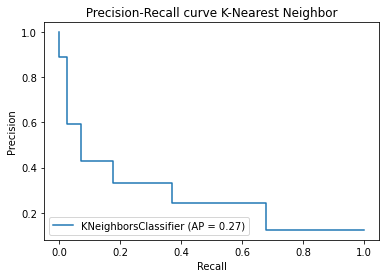

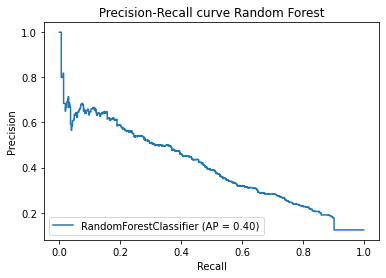

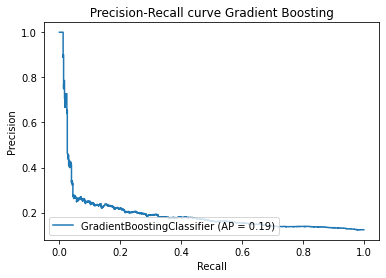

In [46]:
PR(MLLR,'Logistic Regression')
PR(MLDT,'Decision Tree')
PR(MLKN,'K-Nearest Neighbor')
PR(MLRF,'Random Forest')
PR(MLGB,'Gradient Boosting')

From the test, we can conclude that either Random Forest or Decision Tree model give the best result ( ROC AUC SCORE, Precision, Recall, BACC)

For futher improvement, we will check how optimum can this two model reach with HyperparameterTuning ( Grid Search CV)

### Hyperparameter Tuning (Grid Search CV)

In [44]:
from sklearn.model_selection import GridSearchCV

paramRF = {
    'max_depth' : [5, 15, 25, None],
    'min_samples_split' : [2, 4, 5, 10],
    'min_samples_leaf' : [1, 2, 4, 5, 10],
    'n_estimators': [100, 200, 300],
    'class_weight' : [{0:1, 1:2},{0:1, 1:3},{0:1, 1:5}]}


In [45]:
# F1-score

GSCV1 = GridSearchCV(
    MLRF,
    param_grid = paramRF,
    scoring='f1', 
    cv=5, 
    n_jobs = -1)

GSCV1.fit(xtr, ytr)
print(GSCV1.best_params_)
print(GSCV1.best_score_)

{'class_weight': {0: 1, 1: 5}, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.42529304766365106


GSCV F1 Score Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4648
           1       0.42      0.46      0.44       656

    accuracy                           0.85      5304
   macro avg       0.67      0.69      0.68      5304
weighted avg       0.86      0.85      0.86      5304

          Pred 0  Pred 1
Actual 0    4228     420
Actual 1     354     302


Balanced Accuracy Score GSCV1 = 0.6850022039377021




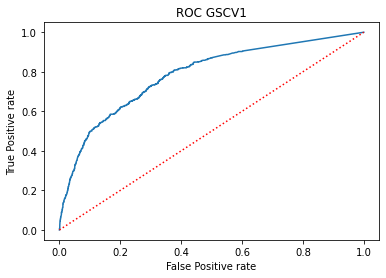

ROC AUC Score GSCV1 = 0.7841813683304647




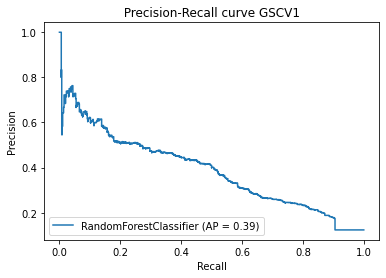

In [50]:
MLRF1B = RandomForestClassifier(
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
    n_estimators = 100,
    class_weight = {0: 1, 1: 5}
)
MLRF1B.fit(xtr,ytr)

print('GSCV F1 Score Report')
print(classification_report(yts, MLRF1B.predict(xts)))
cm = confusion_matrix(yts, MLRF1B.predict(xts),  labels= [0,1])
dfcm = pd.DataFrame(
    cm, columns=['Pred 0','Pred 1'], index= ['Actual 0', 'Actual 1']
)
print(dfcm)
print('\n')

BAC(MLRF1B,'GSCV1')

ROC(MLRF1B,'GSCV1')
plt.show()

AUC(MLRF1B,'GSCV1')

PR(MLRF1B,'GSCV1')

In [46]:
# ROC AUC

GSCV2 = GridSearchCV(
    MLRF,
    param_grid = paramRF, 
    scoring='roc_auc', 
    cv=5, 
    n_jobs = -1)

GSCV2.fit(xtr, ytr)
print(GSCV2.best_params_)
print(GSCV2.best_score_)

{'class_weight': {0: 1, 1: 2}, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.7820442934878143


GSCV ROC AUC Score Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4648
           1       0.47      0.36      0.41       656

    accuracy                           0.87      5304
   macro avg       0.69      0.65      0.67      5304
weighted avg       0.86      0.87      0.86      5304

          Pred 0  Pred 1
Actual 0    4386     262
Actual 1     419     237


Balanced Accuracy Score GSCV2 = 0.652456078670081




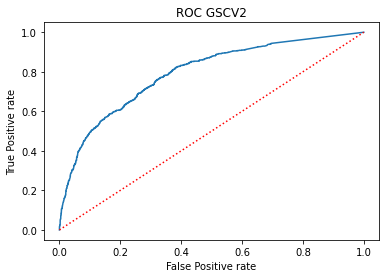

ROC AUC Score GSCV2 = 0.7922883826245749




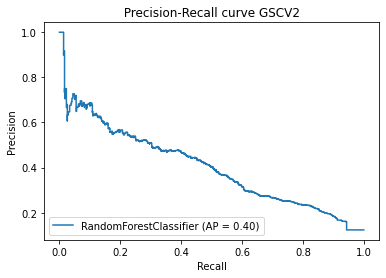

In [48]:
MLRF2B = RandomForestClassifier(
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
    n_estimators = 300,
    class_weight = {0: 1, 1: 2}
)
MLRF2B.fit(xtr,ytr)

print('GSCV ROC AUC Score Report')
print(classification_report(yts, MLRF2B.predict(xts)))
cm = confusion_matrix(yts, MLRF2B.predict(xts),  labels= [0,1])
dfcm = pd.DataFrame(
    cm, columns=['Pred 0','Pred 1'], index= ['Actual 0', 'Actual 1']
)
print(dfcm)
print('\n')

BAC(MLRF2B,'GSCV2')

ROC(MLRF2B,'GSCV2')
plt.show()

AUC(MLRF2B,'GSCV2')

PR(MLRF2B,'GSCV2')

In [49]:
# Precision Recall

GSCV3 = GridSearchCV(
    MLRF,
    param_grid = paramRF, 
    scoring=['precision', 'recall'],
    refit = 'precision',
    cv=5, 
    n_jobs = -1)

GSCV3.fit(xtr, ytr)
print(GSCV3.best_params_)
print(GSCV3.best_score_)

{'class_weight': {0: 1, 1: 2}, 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 100}
0.8399999999999999


GSCV Precision Recall Score Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4648
           1       0.80      0.01      0.02       656

    accuracy                           0.88      5304
   macro avg       0.84      0.51      0.48      5304
weighted avg       0.87      0.88      0.82      5304

          Pred 0  Pred 1
Actual 0    4646       2
Actual 1     648       8


Balanced Accuracy Score GSCV3 = 0.505882414676126




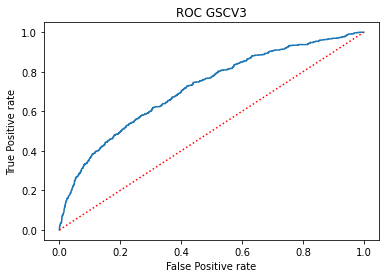

ROC AUC Score GSCV3 = 0.7163382952541876




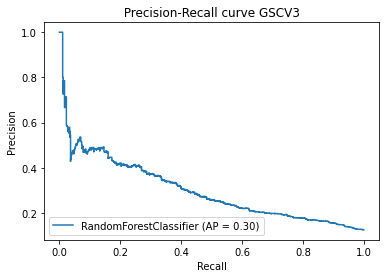

In [49]:
MLRF3B = RandomForestClassifier(
    max_depth = 15,
    min_samples_split = 4,
    min_samples_leaf = 10,
    n_estimators = 100,
    class_weight = {0: 1, 1: 2}
)
MLRF3B.fit(xtr,ytr)

print('GSCV Precision Recall Score Report')
print(classification_report(yts, MLRF3B.predict(xts)))
cm = confusion_matrix(yts, MLRF3B.predict(xts),  labels= [0,1])
dfcm = pd.DataFrame(
    cm, columns=['Pred 0','Pred 1'], index= ['Actual 0', 'Actual 1']
)
print(dfcm)
print('\n')

BAC(MLRF3B,'GSCV3')

ROC(MLRF3B,'GSCV3')
plt.show()

AUC(MLRF3B,'GSCV3')

PR(MLRF3B,'GSCV3')


__Comment__ : Based on Hyperparameter Tuning, it seem that MLRF1B is the best model choice with 
   - Balanced Accuracy Score GSCV1 = 0.68
   - ROC AUC Score GSCV1 = 0.78
   - AP = 0.39

### Cross Validation

In [51]:
from sklearn.model_selection import KFold
k = KFold(n_splits = 10)

In [52]:
reporttrain = []
reportvalid = []

for train,validate in k.split(dftrain):
    xtrain = dftrain.iloc[train][list(xtr.columns.values)]
    ytrain = dftrain.iloc[train]['target']
    xvalid = dftrain.iloc[validate][list(xtr.columns.values)]
    yvalid = dftrain.iloc[validate]['target']
    
    model = MLRF1B
    model.fit(xtrain,ytrain)
    
    ypt = model.predict(xtrain)
    yppt = model.predict_proba(xtrain)
    
    scoretrain = {
        'f1_score_train' : f1_score(ytrain,ypt, pos_label = 1),
        'Recall_train' : recall_score(ytrain,ypt, pos_label = 1),
        'Precision_train' : precision_score(ytrain,ypt, pos_label = 1),
        'BAC_train' :balanced_accuracy_score(ytrain,ypt),
        'ROC_AUC_train' : roc_auc_score(ytrain,yppt[:,1]),
        'MCC' : matthews_corrcoef(ytrain, ypt)
    }
    reporttrain.append(scoretrain)
    
    ypv = model.predict(xvalid)
    yppv = model.predict_proba(xvalid)
    scorevalid = {
        'f1_score_train' : f1_score(yvalid,ypv, pos_label = 1),
        'Recall_train' : recall_score(yvalid,ypv, pos_label = 1),
        'Precision_train' : precision_score(yvalid,ypv, pos_label = 1),
        'BAC_train' :balanced_accuracy_score(yvalid,ypv),
        'ROC_AUC_train' : roc_auc_score(yvalid,yppv[:,1]),
        'MCC' : matthews_corrcoef(yvalid, ypv)
    }
    reportvalid.append(scorevalid)


In [53]:
dfreporttrain =pd.DataFrame(reporttrain)

display(dfreporttrain)
dfreporttrain.mean()

,f1_score_train,Recall_train,Precision_train,BAC_train,ROC_AUC_train,MCC
0,0.693537,0.840299,0.590417,0.880760,0.962557,0.657405
1,0.691309,0.842267,0.586239,0.880904,0.962316,0.655222
2,0.694218,0.842499,0.590321,0.881741,0.962866,0.658371
3,0.689478,0.834372,0.587461,0.878126,0.962562,0.653129
4,0.700274,0.838216,0.601317,0.881294,0.963357,0.663941
5,0.696490,0.846222,0.591780,0.883866,0.963320,0.661422
6,0.692768,0.840369,0.589269,0.880587,0.962919,0.656585
7,0.696231,0.831788,0.598665,0.878367,0.962573,0.659507
8,0.696842,0.841711,0.594519,0.882163,0.963416,0.661157
9,0.693625,0.837659,0.591856,0.879799,0.962796,0.657204


f1_score_train     0.694477
Recall_train       0.839540
Precision_train    0.592184
BAC_train          0.880761
ROC_AUC_train      0.962868
MCC                0.658394
dtype: float64

In [54]:
dfreportvalid=pd.DataFrame(reportvalid)

display(dfreportvalid)
dfreportvalid.mean()

,f1_score_train,Recall_train,Precision_train,BAC_train,ROC_AUC_train,MCC
0,0.422383,0.469880,0.383607,0.684753,0.793641,0.338971
1,0.439689,0.459350,0.421642,0.688363,0.787922,0.363068
2,0.441696,0.502008,0.394322,0.699749,0.789934,0.360675
3,0.484429,0.507246,0.463576,0.709745,0.816136,0.403880
4,0.411111,0.472340,0.363934,0.684739,0.773240,0.330510
5,0.441696,0.482625,0.407166,0.692441,0.778689,0.358161
6,0.429104,0.463710,0.399306,0.685672,0.780851,0.348333
7,0.446529,0.463035,0.431159,0.689404,0.788285,0.367414
8,0.405157,0.433071,0.380623,0.668598,0.774335,0.319123
9,0.450450,0.502008,0.408497,0.702660,0.792612,0.371323


f1_score_train     0.437224
Recall_train       0.475527
Precision_train    0.405383
BAC_train          0.690612
ROC_AUC_train      0.787564
MCC                0.356146
dtype: float64

### Saving Model

<hr>

In [524]:
import joblib

In [525]:
joblib.dump(MLRF1B, 'finalmodelcc')

['finalmodelcc']

### Testing Final Model

<hr>

In [7]:
import joblib

In [32]:
finalmodel = joblib.load('finalmodelcc')

In [9]:
IC = ['IncomeType_Commercial associate', 'IncomeType_Pensioner', 'IncomeType_State servant', 'IncomeType_Student', 'IncomeType_Working']

In [10]:
dfx = pd.DataFrame([{
    'Gender' : 0,
    'Car' :  1,
    'Property' :  0,
    'NoChild' : 0,
    'Income' : 112500.0,
    'Age' : 44,
    'LOE' : 9,
    'Workphone' : 0,
    'Phone' : 0,
    'Email' : 0,
    'FamSize' : 2
}])

In [11]:
def income(x) :
    if x == 'working' :
        return [0,0,0,0,1]
    elif x == 'commercial' :
        return [1,0,0,0,0]
    elif x == 'pensioner' :
        return [0,1,0,0,0]
    elif x == 'state' :
        return [0,0,1,0,0]
    else :
        return [0,0,0,1,0]

In [12]:
IV = income('working')
IV

[0, 0, 0, 0, 1]

In [13]:
dfID = pd.DataFrame([dict(zip(IC,IV))])

In [14]:
dfx = pd.concat([dfx,dfID], axis='columns')
dfx

,Gender,Car,Property,NoChild,Income,Age,LOE,Workphone,Phone,Email,FamSize,IncomeType_Commercial associate,IncomeType_Pensioner,IncomeType_State servant,IncomeType_Student,IncomeType_Working
0,0,1,0,0,112500.0,44,9,0,0,0,2,0,0,0,0,1


In [15]:
EC = ['Education_Academic degree', 'Education_Higher education', 'Education_Incomplete higher', 'Education_Lower secondary', 'Education_Secondary / secondary special']

In [16]:
def education(x) :
    if x == 'higher' :
        return [0,1,0,0,0]
    elif x == 'secondary' :
        return [0,0,0,0,1]
    elif x == 'incomplete' :
        return [0,0,1,0,0]
    elif x == 'lower' :
        return [0,0,0,1,0]
    else :
        return [1,0,0,0,0]

In [17]:
EV = education('secondary')
dfED = pd.DataFrame([dict(zip(EC,EV))])
dfED

,Education_Academic degree,Education_Higher education,Education_Incomplete higher,Education_Lower secondary,Education_Secondary / secondary special
0,0,0,0,0,1


In [18]:
dfx = pd.concat([dfx,dfED], axis='columns')
dfx

,Gender,Car,Property,NoChild,Income,Age,LOE,Workphone,Phone,Email,...,IncomeType_Commercial associate,IncomeType_Pensioner,IncomeType_State servant,IncomeType_Student,IncomeType_Working,Education_Academic degree,Education_Higher education,Education_Incomplete higher,Education_Lower secondary,Education_Secondary / secondary special
0,0,1,0,0,112500.0,44,9,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [19]:
MC = ['MartialStat_Civil marriage', 'MartialStat_Married', 'MartialStat_Separated', 'MartialStat_Single / not married', 'MartialStat_Widow']

In [20]:
def martial(x) :
    if x == 'm' :
        return [0,1,0,0,0]
    elif x == 'w' :
        return [0,0,0,0,1]
    elif x == 's' :
        return [0,0,1,0,0]
    elif x == 'nm' :
        return [0,0,0,1,0]
    else :
        return [1,0,0,0,0]

In [21]:
MV = martial('m')
dfMD = pd.DataFrame([dict(zip(MC,MV))])
dfMD

,MartialStat_Civil marriage,MartialStat_Married,MartialStat_Separated,MartialStat_Single / not married,MartialStat_Widow
0,0,1,0,0,0


In [22]:
dfx = pd.concat([dfx,dfMD], axis='columns')
dfx

,Gender,Car,Property,NoChild,Income,Age,LOE,Workphone,Phone,Email,...,Education_Academic degree,Education_Higher education,Education_Incomplete higher,Education_Lower secondary,Education_Secondary / secondary special,MartialStat_Civil marriage,MartialStat_Married,MartialStat_Separated,MartialStat_Single / not married,MartialStat_Widow
0,0,1,0,0,112500.0,44,9,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [23]:
HC = ['HousingType_Co-op apartment', 'HousingType_House / apartment', 'HousingType_Municipal apartment', 'HousingType_Office apartment', 'HousingType_Rented apartment', 'HousingType_With parents']

In [24]:
def housing(x) :
    if x == 'ra' :
        return [0,0,0,0,1,0]
    elif x == 'h' :
        return [0,1,0,0,0,0]
    elif x == 'ma' :
        return [0,0,1,0,0,0]
    elif x == 'p' :
        return [0,0,0,0,0,1]
    elif x == 'ca' :
        return [1,0,0,0,0,0]
    else :
        return [0,0,0,1,0,0]

In [25]:
HV = housing ('h')
dfHD = pd.DataFrame([dict(zip(HC,HV))])
dfHD

,HousingType_Co-op apartment,HousingType_House / apartment,HousingType_Municipal apartment,HousingType_Office apartment,HousingType_Rented apartment,HousingType_With parents
0,0,1,0,0,0,0


In [26]:
dfx = pd.concat([dfx,dfHD], axis='columns')
dfx

,Gender,Car,Property,NoChild,Income,Age,LOE,Workphone,Phone,Email,...,MartialStat_Married,MartialStat_Separated,MartialStat_Single / not married,MartialStat_Widow,HousingType_Co-op apartment,HousingType_House / apartment,HousingType_Municipal apartment,HousingType_Office apartment,HousingType_Rented apartment,HousingType_With parents
0,0,1,0,0,112500.0,44,9,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [27]:
OC = ['Occupation_Accountants', 'Occupation_Cleaning staff', 
      'Occupation_Cooking staff', 'Occupation_Core staff',
       'Occupation_Drivers', 'Occupation_HR staff',
       'Occupation_High skill tech staff', 'Occupation_IT staff',
       'Occupation_Laborers', 'Occupation_Low-skill Laborers',
       'Occupation_Managers', 'Occupation_Medicine staff', 'Occupation_Others',
       'Occupation_Private service staff', 'Occupation_Realty agents',
       'Occupation_Sales staff', 'Occupation_Secretaries',
       'Occupation_Security staff', 'Occupation_Waiters/barmen staff']

In [28]:
def occupation(x) :
    if x == 'acc' :
        return [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif x == 'clean' :
        return [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif x == 'cooking' :
        return [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif x == 'core' :
        return [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif x == 'driver' :
        return [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif x == 'hr' :
        return [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif x == 'tech' :
        return [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
    elif x == 'it' :
        return [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
    elif x == 'labor' :
        return [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
    elif x == 'ls' :
        return [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
    elif x == 'man' :
        return [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
    elif x == 'med' :
        return [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
    elif x == 'other' :
        return [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
    elif x == 'private' :
        return [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]
    elif x == 'ra' :
        return [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
    elif x == 'sales' :
        return [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
    elif x == 'secre' :
        return [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
    elif x == 'security' :
        return [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
    else :
        return [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]

In [29]:
OV = occupation ('sales')
dfOD = pd.DataFrame([dict(zip(OC,OV))])
dfOD

,Occupation_Accountants,Occupation_Cleaning staff,Occupation_Cooking staff,Occupation_Core staff,Occupation_Drivers,Occupation_HR staff,Occupation_High skill tech staff,Occupation_IT staff,Occupation_Laborers,Occupation_Low-skill Laborers,Occupation_Managers,Occupation_Medicine staff,Occupation_Others,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Waiters/barmen staff
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
dfx = pd.concat([dfx,dfOD], axis='columns')
dfx

,Gender,Car,Property,NoChild,Income,Age,LOE,Workphone,Phone,Email,...,Occupation_Low-skill Laborers,Occupation_Managers,Occupation_Medicine staff,Occupation_Others,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Waiters/barmen staff
0,0,1,0,0,112500.0,44,9,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
FP = finalmodel.predict(dfx)
FPP = finalmodel.predict_proba(dfx)

In [34]:
FP

array([1], dtype=int64)

In [35]:
int(FPP[:,1]*100)

97